# 01- Neural Networks for regression problems **Exercices**

1. Create your own regression dataset and build fit a model to it.
2. Try building a neural network with 4 Dens layers and fitting it to your own regression dataset, how doest it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
    - Building a larger model.
    - Increasing the number of units in each layer.
    - Lookup the documentation of **Adam** and find out what the first parameter is, what happens if you increase it by 10?
    - What happens if you train for longer?
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from Tensorflow `tf.keras.datasets` and model it.

In [81]:
# import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_regression

### 1. Create your own regression dataset and build fit a model to it.

### Create a dataset and visualize it

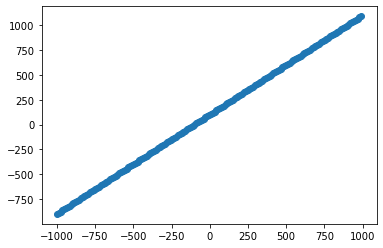

In [109]:
# Create a dataset 
X = np.arange(-1000,1000,12)
y = np.arange(-900,1100,12)

# View the data
plt.scatter(X,y)

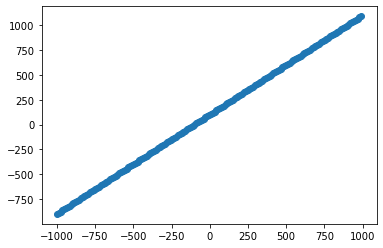

In [110]:
# View the data
plt.scatter(X,y)

### Split the data into a training and test set

In [111]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133,), (34,), (133,), (34,))

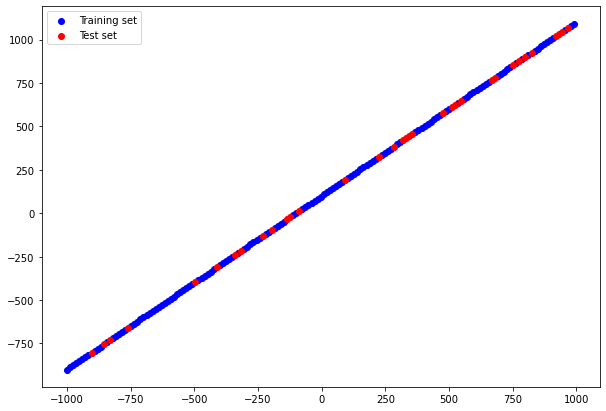

In [112]:
# Visualize the training set and testing set

plt.figure(figsize=(10,7))

# training set
plt.scatter(X_train,y_train, c="blue",label="Training set")

# test set
plt.scatter(X_test,y_test, c = "red", label="Test set")

# legend
plt.legend()

plt.show()

### Build a model

In [113]:
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# fit the model
history1 = model_1.fit(tf.expand_dims(X_train,axis=-1), y_train,epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 997us/step - loss: 307.2618 - mae: 307.2618
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 291.0754 - mae: 291.0754
Epoch 3/100
5/5 [==============================] - 0s 997us/step - loss: 274.3790 - mae: 274.3790
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 257.8125 - mae: 257.8125
Epoch 5/100
5/5 [==============================] - 0s 995us/step - loss: 241.4851 - mae: 241.4851
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 224.8793 - mae: 224.8793
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 208.0611 - mae: 208.0611
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 192.0405 - mae: 192.0405
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 176.6057 - mae: 176.6057
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 161.1908 - mae: 161.1908
Epoch 11/100
5/5 [===============

In [114]:
# Evaluate the model
model_1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 116.1204 - mae: 116.1204


[116.12042236328125, 116.12042236328125]

<Figure size 720x504 with 0 Axes>

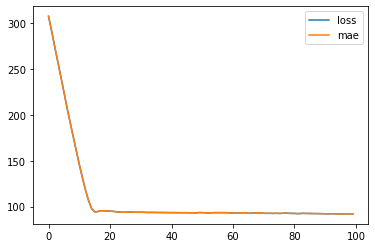

In [115]:
# Visualize the loss during the training
plt.figure(figsize=(10,7))
pd.DataFrame(history1.history).plot()
plt.show()

In [116]:
# Make some predictions
y_pred = model_1.predict(X_test)

In [117]:
def plot_predictions(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, predictions = y_pred):
    """
    Plot the Training set, the test set and the predictions on a figure

    Inputs:
    - X_train : features data of the training set
    - y_train : labels of the training set
    - X_test : features data of the test set
    - y_test : labels of the test set
    - predictions : result of the prediction made by the model
    """

    plt.figure(figsize=(10,7))

    # training set
    plt.scatter(X_train,y_train, c="blue",label="Training set")

    # test set
    plt.scatter(X_test,y_test, c = "red", label="Test set")

    # predictions
    plt.scatter(X_test, predictions, c = "green", label = "Predictions")

    # legend
    plt.legend()

    plt.show()

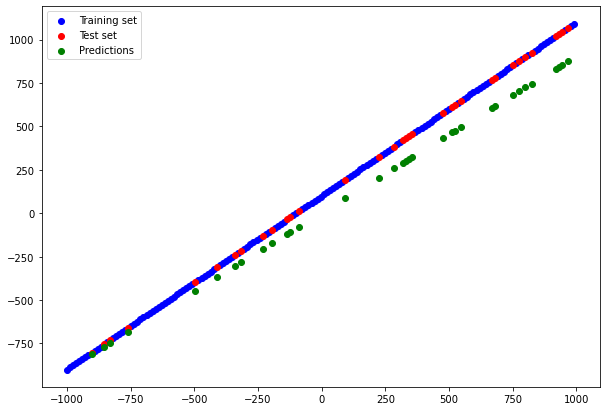

In [118]:
# Visualize the prediction
plot_predictions(predictions = y_pred)

### 2. Try building a neural network with 4 Dense layers and fitting it to the regression dataset

In [119]:
# Build a neural network with 4 layers

tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# fit
history2 = model_2.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 623.8625 - mae: 623.8625
Epoch 2/100
5/5 [==============================] - 0s 998us/step - loss: 572.3877 - mae: 572.3877
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 520.4965 - mae: 520.4965
Epoch 4/100
5/5 [==============================] - 0s 988us/step - loss: 468.5884 - mae: 468.5884
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 415.2545 - mae: 415.2545
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 357.3199 - mae: 357.3199
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 293.7671 - mae: 293.7671
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 227.1652 - mae: 227.1652
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 157.4722 - mae: 157.4722
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 99.2620 - mae: 99.2620
Epoch 11/100
5/5 [===================

In [120]:
# Evaluate the model
model_2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 112.0491 - mae: 112.0491


[112.04911041259766, 112.04911041259766]

<AxesSubplot:>

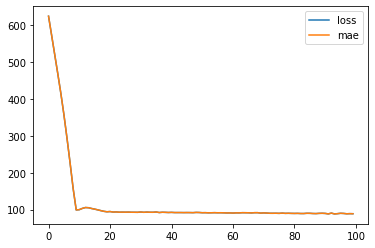

In [121]:
# Visualize the loss curve
pd.DataFrame(history2.history).plot()

<AxesSubplot:>

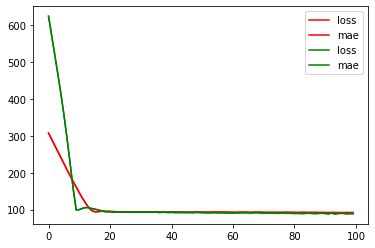

In [122]:
# compare the loss curves
ax = pd.DataFrame(history1.history).plot(c="red")
pd.DataFrame(history2.history).plot(ax=ax,c="green")


In [123]:
# Make some predictions
y_pred2 = model_2.predict(X_test)

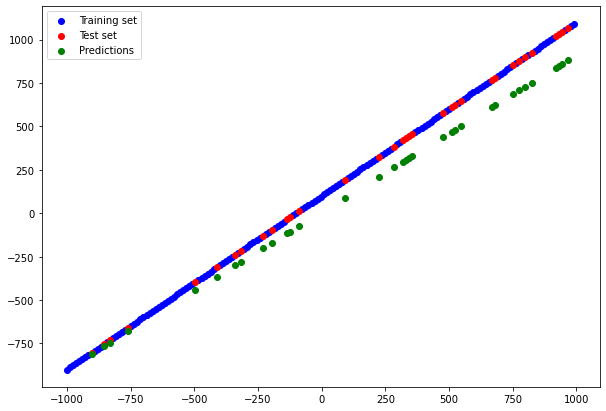

In [124]:
plot_predictions(predictions=y_pred2)

### Let's try on a regression dataset from Sklearn

In [131]:
# Create  a regression data with Scikit-Learn
X, y = make_regression(n_samples=300, n_features=10,n_targets=1)

X.shape, y.shape

((300, 10), (300,))

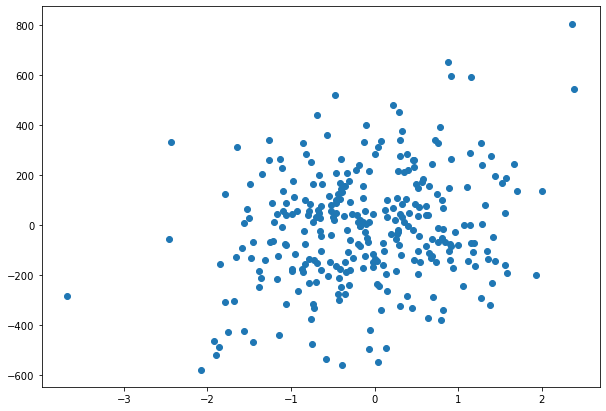

In [132]:
# Visualize the dataset

plt.figure(figsize=(10,7))
plt.scatter(X[:,0],y)
plt.show()

In [134]:
# Split the data in two set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 10), (60, 10), (240,), (60,))

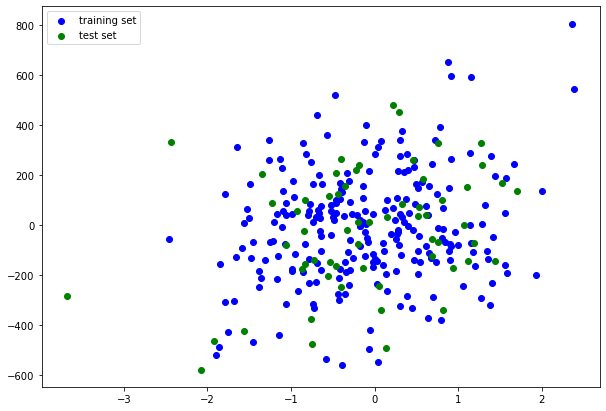

In [135]:
# Visualize the training and test set
plt.figure(figsize=(10,7))
plt.scatter(X_train[:,0],y_train, c= "blue",label="training set")
plt.scatter(X_test[:,0],y_test,c="green",label="test set")
plt.legend()
plt.show()

In [140]:
# Build a first model 

tf.random.set_seed(42)

# create model
model_reg1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_reg1.compile(loss=tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mse"])

#fit
history_reg1 = model_reg1.fit(X_train,y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 171.9136 - mse: 49445.0273
Epoch 2/100
8/8 [==============================] - 0s 988us/step - loss: 171.8497 - mse: 49411.1836
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 171.7868 - mse: 49378.6133
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 171.7247 - mse: 49345.2109
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 171.6611 - mse: 49310.2031
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 171.5985 - mse: 49277.6172
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 171.5329 - mse: 49241.9453
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 171.4663 - mse: 49206.1094
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 171.4001 - mse: 49171.1484
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 171.3283 - mse: 49131.6602
Epoch 11/100
8/8 

In [141]:
# Evaluate the model
mae_reg1,mse_reg1 = model_reg1.evaluate(X_test,y_test)
mae_reg1,mse_reg1

2/2 [==============================] - 0s 2ms/step - loss: 166.3455 - mse: 42494.9922


(166.3455352783203, 42494.9921875)

<AxesSubplot:>

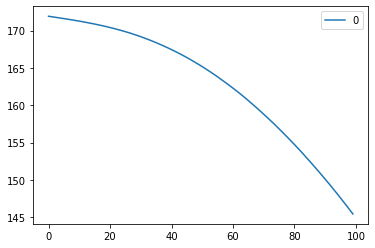

In [143]:
# Visualize loss curve
pd.DataFrame(history_reg1.history["loss"]).plot()

In [144]:
# Make some predictions
y_pred_reg1 = model_reg1.predict(X_test)

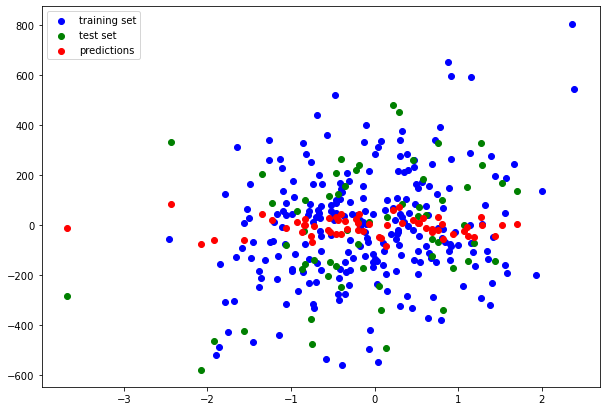

In [145]:
# Visualize the training and test set and predictions
plt.figure(figsize=(10,7))
plt.scatter(X_train[:,0],y_train, c= "blue",label="training set")
plt.scatter(X_test[:,0],y_test,c="green",label="test set")
plt.scatter(X_test[:,0],y_pred_reg1,c="red",label="predictions")
plt.legend()
plt.show()

The model is trying to predict the points but it's not doing a great job.

Let's improve our model

In [148]:
# Building a model with 4 layers

tf.random.set_seed(42)

# create
model_reg2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
model_reg2.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

# fit
history_reg2 = model_reg2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 171.8279 - mae: 171.8279
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 171.4129 - mae: 171.4129
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 170.9374 - mae: 170.9374
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 170.3476 - mae: 170.3476
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 169.5573 - mae: 169.5573
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 168.4797 - mae: 168.4797
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 166.9720 - mae: 166.9720
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 164.8796 - mae: 164.8796
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 162.0864 - mae: 162.0864
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 158.0576 - mae: 158.0576
Epoch 11/100
8/8 [=====================

In [149]:
# Evaluate the model
mae_reg2,mse_reg2 = model_reg2.evaluate(X_test,y_test)
mae_reg2,mse_reg2

2/2 [==============================] - 0s 2ms/step - loss: 0.4027 - mae: 0.4027


(0.40274277329444885, 0.40274277329444885)

<AxesSubplot:>

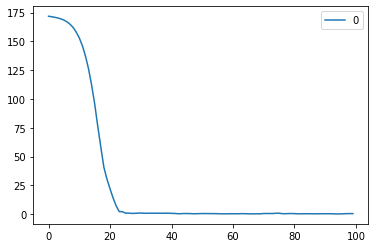

In [150]:
# Visualize the loss curve
pd.DataFrame(history_reg2.history["loss"]).plot()

In [154]:
# Compare the result
model_results = [["model_1",mae_reg1,mse_reg1],
                 ["model_2", mae_reg2, mse_reg2]]

df_result = pd.DataFrame(model_results, columns=["model","mae","mse"])
df_result

,model,mae,mse
0,model_1,166.345535,42494.992188
1,model_2,0.402743,0.402743


By building a larger model with 4 layers, the loss decreased and nearly reach 0. 

In [151]:
# Make predictions
y_pred_reg2 = model_reg2.predict(X_test)

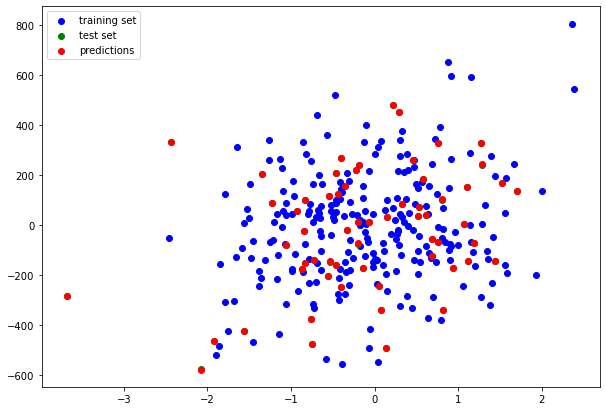

In [152]:
# Visualize the training and test set and predictions
plt.figure(figsize=(10,7))
plt.scatter(X_train[:,0],y_train, c= "blue",label="training set")
plt.scatter(X_test[:,0],y_test,c="green",label="test set")
plt.scatter(X_test[:,0],y_pred_reg2,c="red",label="predictions")
plt.legend()
plt.show()

As we can see the model has predicted every test data correctly. Indeed the red dot (predictions) overlapped the green dot (test data).

### 3. Try and improve the results we got on the insurance dataset

In [25]:
# import librairies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [26]:
# insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

#### Exploratory Data Analysis

In [27]:
insurance.shape

(1338, 7)

The dataset has 1338 rows and 7 columns

In [28]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We are trying to predict the `charges`

In [29]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [30]:
insurance.dtypes[insurance.dtypes == "object"]

sex       object
smoker    object
region    object
dtype: object

the dataset has 3 categorical features

In [31]:
insurance.dtypes[insurance.dtypes != "object"]

age           int64
bmi         float64
children      int64
charges     float64
dtype: object

The dataset has 3 numerical features : `age`, `bmi` and `children`

In [32]:
# info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset has not empty values

In [33]:
# describe 
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Preprocessing

In [34]:
# Transform the categorical features into numerical values

data_one_hot = pd.get_dummies(insurance)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Split the data

In [35]:
# Split the data
X = data_one_hot.drop("charges",axis=1)
y = data_one_hot["charges"]

X.shape, y.shape

((1338, 11), (1338,))

In [36]:
# Split into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

#### Build a first model

`insurance_model1` :
- 4 layers
- Adam optimizer
- epochs : 200

In [37]:
# Model with 4 layers

tf.random.set_seed(42)

# create a model
insurance_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model1.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# fit
history_insurance1 = insurance_model1.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13083.3330 - mae: 13083.3330
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 10235.6064 - mae: 10235.6064
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7497.1274 - mae: 7497.1274
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7340.1343 - mae: 7340.1343
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7254.9688 - mae: 7254.9688
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7121.5596 - mae: 7121.5596
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7012.7661 - mae: 7012.7661
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 6861.5430 - mae: 6861.5430
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6728.6528 - mae: 6728.6528
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 6619.0166 - mae: 6619.

In [38]:
# evaluate
insurance_model1.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3569.2939 - mae: 3569.2939


[3569.2939453125, 3569.2939453125]

In the notebook the last model obtained the following results by using normalization:
[3171.577392578125, 3171.577392578125]

As we can see by building a larger model without normalization have a result closed to the one we built in the notebook.

Let's see if we can improve our model by tuning some hyperparameters

<AxesSubplot:>

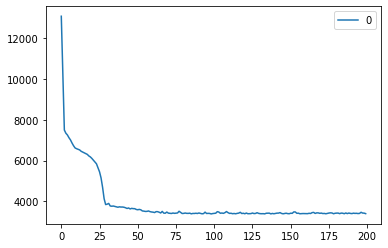

In [39]:
# visualize loss curve
pd.DataFrame(history_insurance1.history["loss"]).plot()

#### improve our model by adding more hidden units

`insurance_model2`:
- 4 layers
- more hidden units
- Adam optimizer
- 200 epochs

In [44]:
# Build a second model

tf.random.set_seed(42)

# Create a model
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

# fit
history_insurance2 = insurance_model2.fit(X_train,y_train,epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 10697.0312 - mae: 10697.0312
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 7404.4429 - mae: 7404.4429
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7079.3242 - mae: 7079.3242
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 6739.8799 - mae: 6739.8799
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6635.2837 - mae: 6635.2837
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6524.3267 - mae: 6524.3267
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6463.0254 - mae: 6463.0254
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6401.0991 - mae: 6401.0991
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6267.0322 - mae: 6267.0322
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6185.3521 - mae: 6185.35

In [45]:
# Evaluate the model
insurance_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3617.8997 - mae: 3617.8997


[3617.899658203125, 3617.899658203125]

<AxesSubplot:>

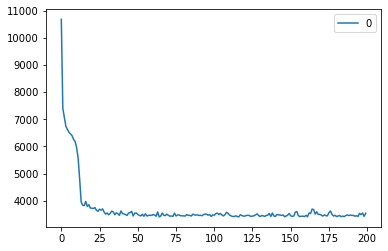

In [46]:
# visualize loss curve
pd.DataFrame(history_insurance2.history["loss"]).plot()

It seems even increasing the number of hidden units the model isn't performing an greater level.
Let's try to change the learning rate to see if it improves the results of our model and increase the number of epochs.

`insurance_model3` :
- 4 layers
- more hidden units
- Adam optimizer with different learning rate
- epochs 300 : increase the number of epochs

In [57]:
# build the model

tf.random.set_seed(42)

# create model
insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model3.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics = ["mae"])

# fit
history_insurance3 = insurance_model3.fit(X_train,y_train,epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 1ms/step - loss: 12742.7070 - mae: 12742.7070
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 8201.8682 - mae: 8201.8682
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 7277.3403 - mae: 7277.3403
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7134.3516 - mae: 7134.3516
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 6913.9023 - mae: 6913.9023
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 6728.1816 - mae: 6728.1816
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 6637.3052 - mae: 6637.3052
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 6581.4697 - mae: 6581.4697
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 6581.8857 - mae: 6581.8857
Epoch 10/300
34/34 [==============================] - 0s 1ms/step - loss: 6509.5620 - mae: 6509.56

In [58]:
# evaluate the model
insurance_model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 930us/step - loss: 3578.7183 - mae: 3578.7183


[3578.71826171875, 3578.71826171875]

<AxesSubplot:>

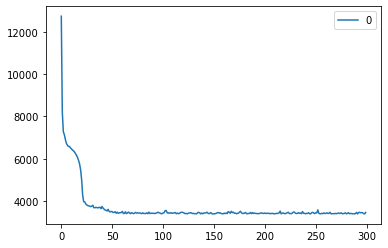

In [59]:
# visualize loss curve
pd.DataFrame(history_insurance3.history["loss"]).plot()

It seems even increasing the learning rate and the number of epochs the model isn't performing an greater level.

## 4. Improve the Boston pricing dataset from TensorFlow

> **Note:** use `tf.keras.datasets` to import the dataset

In [64]:
train_data, test_data = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz",test_split=0.2,seed=42)

In [66]:
# View data
train_data

(array([[9.1780e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9550e+02,
         9.0400e+00],
        [5.6440e-02, 4.0000e+01, 6.4100e+00, ..., 1.7600e+01, 3.9690e+02,
         3.5300e+00],
        [1.0574e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 3.9011e+02,
         1.8070e+01],
        ...,
        [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
         1.0560e+01],
        [5.2058e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8845e+02,
         9.5400e+00],
        [2.5199e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8943e+02,
         1.8060e+01]]),
 array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
        18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
        12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
        20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
        22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
        21.2, 18.4, 28.5, 23.9, 18.5, 2

In [67]:
# Split the train data into x_train and y_train, X_test and y_test
X_train = train_data[0]
y_train = train_data[1]
X_test = test_data[0]
y_test = test_data[1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

Samples contrain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

The attributes themselves are defined in the [StatLib website](http://lib.stat.cmu.edu/datasets/boston).



### Exploratory Data analysis

In [71]:
# X_train
X_train

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9550e+02,
        9.0400e+00],
       [5.6440e-02, 4.0000e+01, 6.4100e+00, ..., 1.7600e+01, 3.9690e+02,
        3.5300e+00],
       [1.0574e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 3.9011e+02,
        1.8070e+01],
       ...,
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       [5.2058e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8845e+02,
        9.5400e+00],
       [2.5199e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8943e+02,
        1.8060e+01]])

In [72]:
# y_train

y_train

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

As we can see the dataset is numpy array format and it's normalized.

The only thing we need to do with this dataset is to creat models and check if the models can perform well to predict the prices of boston houses according to the features.

### Build a first model 

In [74]:
# Create a model
tf.random.set_seed(42)

house_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# compile
house_model1.compile(loss = tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["mse"])

# fit
history_house1 = house_model1.fit(X_train,y_train,epochs = 300)

Epoch 1/300
13/13 [==============================] - 0s 1ms/step - loss: 33.5498 - mse: 1995.3126
Epoch 2/300
13/13 [==============================] - 0s 1ms/step - loss: 11.5058 - mse: 220.3187
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 8.9677 - mse: 136.4273
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 7.0996 - mse: 93.5589
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 7.6677 - mse: 104.6125
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 6.2716 - mse: 74.7754
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 7.0041 - mse: 83.8131
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 6.4361 - mse: 74.6822
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 8.8857 - mse: 125.0092
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 7.0262 - mse: 85.6326
Epoch 11/300
13/13 [=====================

In [75]:
# Evaluate the model
house_model1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 985us/step - loss: 3.7293 - mse: 34.6013


[3.7293365001678467, 34.601295471191406]

<AxesSubplot:>

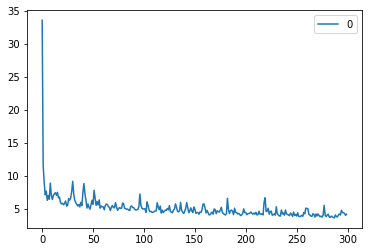

In [76]:
# Visualize loss curve
pd.DataFrame(history_house1.history["loss"]).plot()